<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#IHC" data-toc-modified-id="IHC-5">IHC</a></span><ul class="toc-item"><li><span><a href="#KM" data-toc-modified-id="KM-5.1">KM</a></span></li><li><span><a href="#Cox" data-toc-modified-id="Cox-5.2">Cox</a></span></li></ul></li><li><span><a href="#Gene-expression" data-toc-modified-id="Gene-expression-6">Gene expression</a></span><ul class="toc-item"><li><span><a href="#KM" data-toc-modified-id="KM-6.1">KM</a></span></li><li><span><a href="#Cox" data-toc-modified-id="Cox-6.2">Cox</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
library(ggplot2)
library(survival)
library(survminer)
library(forestmodel)

Loading required package: ggpubr



# Functions

In [2]:
source("~/OneDrive - UHN/R_src//ggplot2_theme.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"

# Main

In [4]:
metadata <- read.csv(file.path(datapath,"IND_estimate_metadata_IHC_trb_tmb.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [5]:
table(metadata$disease_group)


     EWS Lymphoma      NBL       OS   Others      RMS       RT     SARC 
       6       11        9        8        8        8        4        6 
   WILMS 
       6 

In [6]:
table(metadata$sample_origin)


         Adrenal gland                   Bone                  Brain 
                     5                      7                      5 
Connective/Soft tissue                 Kidney                   Lung 
                    10                      5                     11 
            Lymph node                 Others 
                    11                     12 

In [7]:
summary(metadata$IHC_PDL1IC)

summary(metadata$IHC_PDL1TC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.500   5.177   1.000  60.000       4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.0    10.3     0.0   100.0       5 

In [8]:
metadata[ metadata$disease_group == "Lymphoma",c("disease_group", "IHC_PDL1TC")]

,disease_group,IHC_PDL1TC
,<chr>,<dbl>
2,Lymphoma,50
3,Lymphoma,50
23,Lymphoma,100
35,Lymphoma,10
39,Lymphoma,13
52,Lymphoma,100
55,Lymphoma,NA
56,Lymphoma,80
58,Lymphoma,0


In [9]:
summary(metadata$IHC_PDL1IC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.500   5.177   1.000  60.000       4 

In [10]:
tapply(metadata$IHC_PDL1IC , metadata$cancer, summary)

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.50   15.00   15.00   26.86   45.00   60.00 

$`Solid tumour`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.5     0.5     0.5     5.0       4 


In [11]:
t.test(metadata$IHC_PDL1IC ~ metadata$cancer)


	Welch Two Sample t-test

data:  metadata$IHC_PDL1IC by metadata$cancer
t = 4.2725, df = 10.006, p-value = 0.001628
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 12.61589 40.11138
sample estimates:
    mean in group Lymphoma mean in group Solid tumour 
                  26.86364                    0.50000 


In [12]:
tapply(metadata$IHC_PDL1IC , metadata$disease_group, summary)

$EWS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.0     0.2     0.5     0.5       1 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.50   15.00   15.00   26.86   45.00   60.00 

$NBL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.5000  0.3125  0.5000  0.5000       1 

$OS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.5     0.5     0.5     2.0       1 

$Others
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.375   0.500   0.500   0.625   1.000 

$RMS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00    0.25    0.50    1.00 

$RT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.500   0.500   0.500   1.625   1.625   5.000 

$SARC
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.5     0.5     0.5     0.5     1.0       1 

$WILMS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.2500  0.5833  0.8750  

In [13]:
table(metadata$IHC_PDL1TC )


  0 0.5  10  13  15  45  50  70  80  95 100 
 49   1   1   1   1   1   2   1   1   1   2 

In [14]:
tapply(metadata$IHC_PDL1TC , metadata$cancer, summary)

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   21.00   50.00   54.30   91.25  100.00       1 

$`Solid tumour`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   1.676   0.000  70.000       4 


In [15]:
t.test(metadata$IHC_PDL1TC ~ metadata$cancer)


	Welch Two Sample t-test

data:  metadata$IHC_PDL1TC by metadata$cancer
t = 4.3111, df = 9.2404, p-value = 0.001842
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 25.11959 80.12746
sample estimates:
    mean in group Lymphoma mean in group Solid tumour 
                 54.300000                   1.676471 


# IHC

In [16]:
table(metadata$PDL1)


         High           Low No expression 
           11             1            50 

In [17]:
summary(metadata$IHC_PDL1TC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.0    10.3     0.0   100.0       5 

In [18]:
metadata$PDL1 <- factor(metadata$PDL1, levels = c("No expression", "Low", "High"))

## KM

In [19]:
metadata$PDL1group <- NA
metadata$PDL1group[metadata$PDL1 == "High"] <- "High"
metadata$PDL1group[metadata$PDL1 == "Low"] <- "Low/No"
metadata$PDL1group[metadata$PDL1 == "No expression"] <- "Low/No"

In [20]:
metadata$IHC_PDL1IC[metadata$PDL1 == "No expression"]

[1] 2.0 0.5 0.0 0.0  NA 0.0 0.0 0.5 0.5 0.5 0.5 0.5  NA 0.5  NA 0.5 0.5 0.5 0.0
[20] 0.5 0.0 0.5 0.0 0.0 1.0  NA 0.5 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.5 0.0 0.0 0.5
[39] 0.0 0.5 1.0 1.0 0.5 0.0 0.0 0.0 0.5 0.0 0.5 0.5 0.5 0.5 0.5 0.5

In [21]:
sfit <- survfit(Surv(TRTDUR, progressed)~ PDL1group, data= metadata)

    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "KM analysis of PDL1 protein expression")

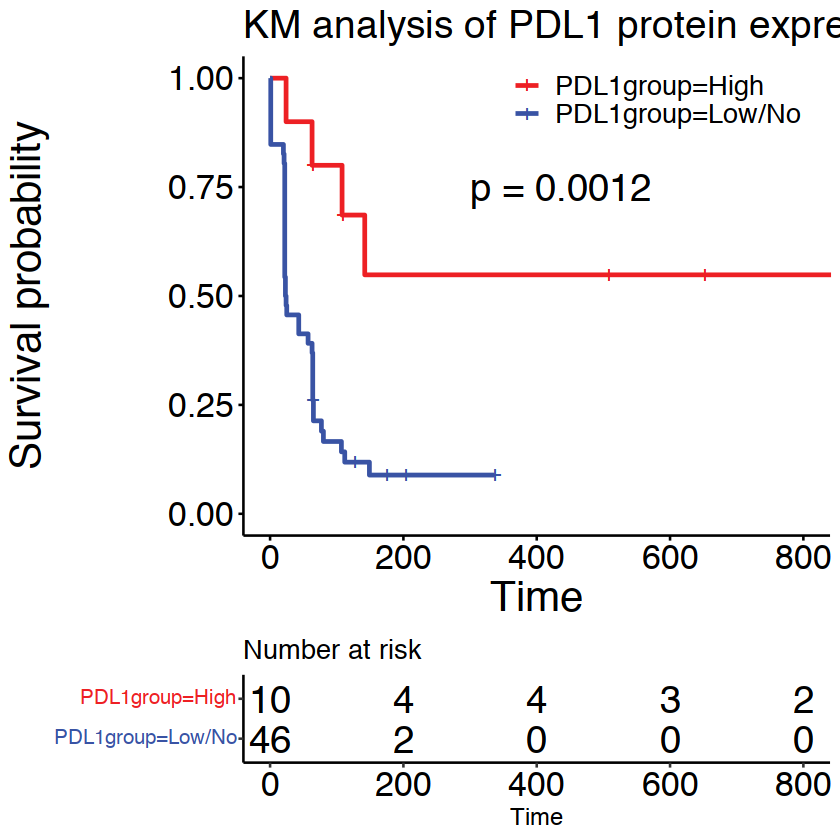

In [22]:
kmplot

In [23]:
pdf(file = paste0(plotpath,"KM_PDL1_IHC.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

## Cox

In [24]:
metadata$PDL1group <- factor(metadata$PDL1group, levels = c("Low/No", "High"))

In [63]:
coxmodel <- coxph(Surv(TRTDUR, progressed)~ PDL1group + cancer + AGE, 
                  data= metadata) 
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ PDL1group + cancer + 
    AGE, data = metadata)

  n= 56, number of events= 46 
   (10 observations deleted due to missingness)

                       coef exp(coef) se(coef)      z Pr(>|z|)  
PDL1groupHigh      -2.14808   0.11671  0.98358 -2.184    0.029 *
cancerSolid tumour -0.63079   0.53217  0.88749 -0.711    0.477  
AGE                -0.02057   0.97964  0.02783 -0.739    0.460  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
PDL1groupHigh         0.1167      8.568   0.01698    0.8023
cancerSolid tumour    0.5322      1.879   0.09346    3.0303
AGE                   0.9796      1.021   0.92763    1.0346

Concordance= 0.65  (se = 0.044 )
Likelihood ratio test= 13.7  on 3 df,   p=0.003
Wald test            = 9.49  on 3 df,   p=0.02
Score (logrank) test = 11.15  on 3 df,   p=0.01


In [64]:
pdl1protein_cox <- forest_model(coxmodel,exponentiate = TRUE) + 
labs(title = "Cox for PDL1 protein expression adjusting for cancer group")

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


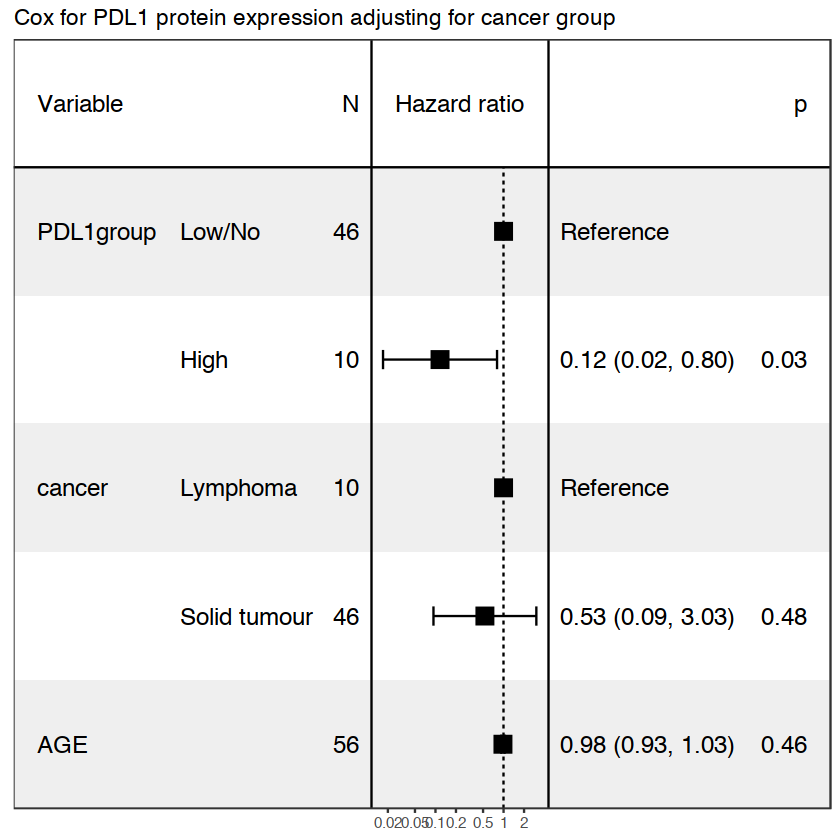

In [65]:
pdl1protein_cox

In [66]:
pdf(file = paste0(plotpath,"PDL1_IHC_cox.pdf"),
    width = 15, 
    height = 10,
    useDingbats = FALSE)

pdl1protein_cox

dev.off()

pdf 
  2